In [1]:
#Download important libraries. They are FREE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read source file. IPL history CSV file.
ipl_matches = pd.read_csv('matches.csv')

In [3]:
#Show some random records instead of head().

#Use head() for starting 5 records
random_sample = ipl_matches.sample(n=5)

random_sample

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
560,561,2015,Raipur,09/05/15,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,6,0,MC Henriques,Shaheed Veer Narayan Singh International Stadium,VA Kulkarni,S Ravi,NaN
55,56,2017,Mumbai,16/05/17,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,20,0,Washington Sundar,Wankhede Stadium,S Ravi,C Shamshuddin,NaN
85,86,2008,Mumbai,07/05/08,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen,NaN
329,330,2012,Chandigarh,18/04/12,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,8,G Gambhir,"Punjab Cricket Association Stadium, Mohali",JD Cloete,RJ Tucker,NaN
324,325,2012,Kolkata,15/04/12,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,2,0,SP Narine,Eden Gardens,Asad Rauf,S Asnani,NaN


In [5]:
# print shape of the data set. Rows are number of matches played and columns are participants/action for each match
ipl_matches.shape

(636, 18)

In [4]:
#Let's print total columns for our dataset
ipl_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
#check if data set has null values. 0 - Doesn't have null. Any number = number of rows have null values
ipl_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

# From above we can see City,winner,Player_of_match and umpire1/2/3 columns have few null values. Total 6 columns.


In [5]:
#let's assume if we have 1000's of columns in real world problem data set and you want to know how many are having null values. 
#Its difficult to notedown every null column from the above method. 
#Let's try something different, so that we can see only those columns which have nulls
null_only = ipl_matches.columns[ipl_matches.isnull().any()]
ipl_matches[null_only].isnull().sum()

city                 7
winner               3
player_of_match      3
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [6]:
#Now lets see how much value those null can add to our data set. Definitely Umpires doesn't add value to the data set.
#print (ipl_matches[ipl_matches.isnull().any(axis=1)][null_only].head())
#Pull winner column which have nulls
print (ipl_matches[ipl_matches["winner"].isnull()][null_only])

          city winner player_of_match          umpire1       umpire2  umpire3
300      Delhi    NaN             NaN        SS Hazare     RJ Tucker      NaN
545  Bangalore    NaN             NaN        JD Cloete     PG Pathak      NaN
570  Bangalore    NaN             NaN  HDPK Dharmasena  K Srinivasan      NaN


In [10]:
# Lets find out in next step, why I am enquiring about 'result' in the below code
ipl_matches['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [7]:
#Now we need to validate what was the 'result' for those matches where 'winner' has NaN. Pulling data using index numbers
#This step is to make sure result is not 'Normal'. If its not a normal then match really didn't happen. 
ipl_matches.loc[[300,545,570]]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,21/05/11,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,29/04/15,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,17/05/15,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [8]:
# Let's see whole data collectively
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [9]:
#Lets See data set summary
ipl_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [10]:
# from the initial data set we can clearly see that few features like, result,umpire1/2/3,venue and dl_applied
#will not add value to our Exploratory Data Analysis (EDA). Lets go ahead and remove them.
ipl_matches.drop(columns=['result', 'dl_applied', 'venue', 'umpire1', 'umpire2','umpire3'], inplace=True)


In [11]:
# Lets Validate the shape.Since we eliminated six columns, our shape should look like (636,12)
ipl_matches.shape

(636, 12)

In [12]:
#which team won maximum number of matches
win_chart = ipl_matches['winner'].value_counts()
print ('Team which won maximum number of matches in IPL :', win_chart.head(1))

#which team won minimum number of matches
print ('Team which won minimum number of matches in IPL :', win_chart.tail(1))



Team which won maximum number of matches in IPL : Mumbai Indians    92
Name: winner, dtype: int64
Team which won minimum number of matches in IPL : Rising Pune Supergiants    5
Name: winner, dtype: int64


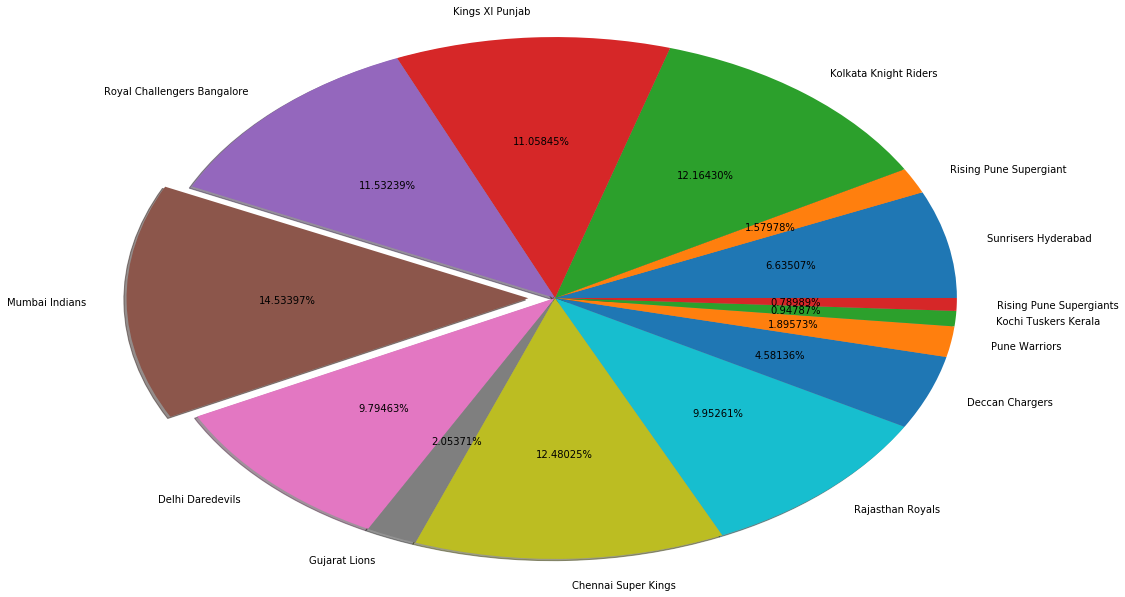

In [18]:
labels = ['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala','Rising Pune Supergiants']
values = [42,10,77,70,73,92,62,13,79,63,29,12,6,5]
explode = [0,0,0,0,0,0.2,0,0,0,0,0,0,0,0]
fig1,ax1 = plt.subplots()
ax1.pie(values,labels=labels,explode=explode,shadow=True,radius=3,autopct='%.5f%%')
plt.show()


In [44]:
#Who won maximum times Player of the match
print (ipl_matches['player_of_match'].value_counts().head(1))

CH Gayle    18
Name: player_of_match, dtype: int64


In [19]:
#Lets see if winning a toss does an impact on winning game. 
#Here we are trying to understand toss winner decision (bat/field first) will make an impact.
# Create a table for toss_winner and winner for easy access and computation
w_l = ipl_matches[['toss_winner','winner']]

# Compare same rows (axis=1) of both columns and create new variable
w_l['toss_vs_win'] = w_l.apply(lambda x : 1 if x['toss_winner'] == x['winner'] else 0, axis=1) 

# Manually validate random records. 0 = No impact, 1 = Impact
w_l.sample(n=5)
        
        

C:\Users\Shankar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,toss_winner,winner,toss_vs_win
98,Mumbai Indians,Mumbai Indians,1
134,Kings XI Punjab,Kings XI Punjab,1
225,Royal Challengers Bangalore,Mumbai Indians,0
236,Kochi Tuskers Kerala,Royal Challengers Bangalore,0
435,Rajasthan Royals,Rajasthan Royals,1


In [20]:
# Check the count for each 0 & 1. Remember total games played are 636, including 3 NaN (we can ignore this) for winner.
w_l['toss_vs_win'].value_counts()

1    325
0    311
Name: toss_vs_win, dtype: int64

# There is no marginal difference b/w 1 and 0.We can conclude that winning a toss is not a BIG Deal